In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#mengimport library numpy dan diinisialisasikan dengan nama np, untuk pandas bernama pd

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import re,string,unicodedata
from string import punctuation
from wordcloud import WordCloud,STOPWORDS


from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
dfpredicted = pd.read_json('TiktokPredicted.json',lines="True")

In [4]:
dfpredicted.head(5)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,cleanedcontent,Predict
0,snscrape.modules.twitter.Tweet,https://twitter.com/aispeke/status/14545989752...,2021-10-30 23:59:55,tw: tiktok https://t.co/xf7jyqlzba,Tw: tiktok twitter.com/FelizAntes/sta…,1454598975294685184,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,None,None,tau,negatif
1,snscrape.modules.twitter.Tweet,https://twitter.com/lucasu_san/status/14545988...,2021-10-30 23:59:32,para wibu di tiktok tuh kepikiran buat belajar...,Para wibu di tiktok tuh kepikiran buat belajar...,1454598878435680258,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,None,None,None,None,None,weeaboo pikir ajar kosakata jepang cringe lihat,negatif
2,snscrape.modules.twitter.Tweet,https://twitter.com/uu_sutari13/status/1454598...,2021-10-30 23:58:51,"generasi tiktok,klo gak sawan ya stress...hah...","@didihadid_ Generasi tiktok,klo gak sawan ya s...",1454598707542851588,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,1.454598e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,generasi sawan stres hahhahahaa,negatif
3,snscrape.modules.twitter.Tweet,https://twitter.com/diilaaja/status/1454598648...,2021-10-30 23:58:37,hah kok betah sih nahan minum? to the point a...,@txtdrorgmiskin Hah kok betah sih nahan minum?...,1454598648663134215,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,1.453981e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,ha betah tahan minum to the point deh haus hau...,negatif
4,snscrape.modules.twitter.Tweet,https://twitter.com/pitaaakku/status/145459843...,2021-10-30 23:57:47,nih gada yang jual like instagram sama tiktok ...,Nih gada yang jual like Instagram sama tiktok ...,1454598439816343559,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,0,...,None,NaN,None,None,None,None,None,None,nih jual like instagram kah butuh banget drop ...,negatif


In [5]:
dfpredicted = dfpredicted[['date','cleanedcontent','Predict']]

In [6]:
dfpredicted.head()

,date,cleanedcontent,Predict
0,2021-10-30 23:59:55,tau,negatif
1,2021-10-30 23:59:32,weeaboo pikir ajar kosakata jepang cringe lihat,negatif
2,2021-10-30 23:58:51,generasi sawan stres hahhahahaa,negatif
3,2021-10-30 23:58:37,ha betah tahan minum to the point deh haus hau...,negatif
4,2021-10-30 23:57:47,nih jual like instagram kah butuh banget drop ...,negatif


C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


negatif    19441
positif      559
Name: Predict, dtype: int64

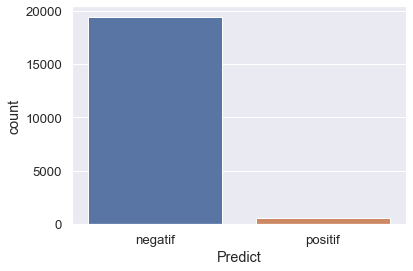

In [7]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(dfpredicted.Predict)
dfpredicted['Predict'].value_counts()

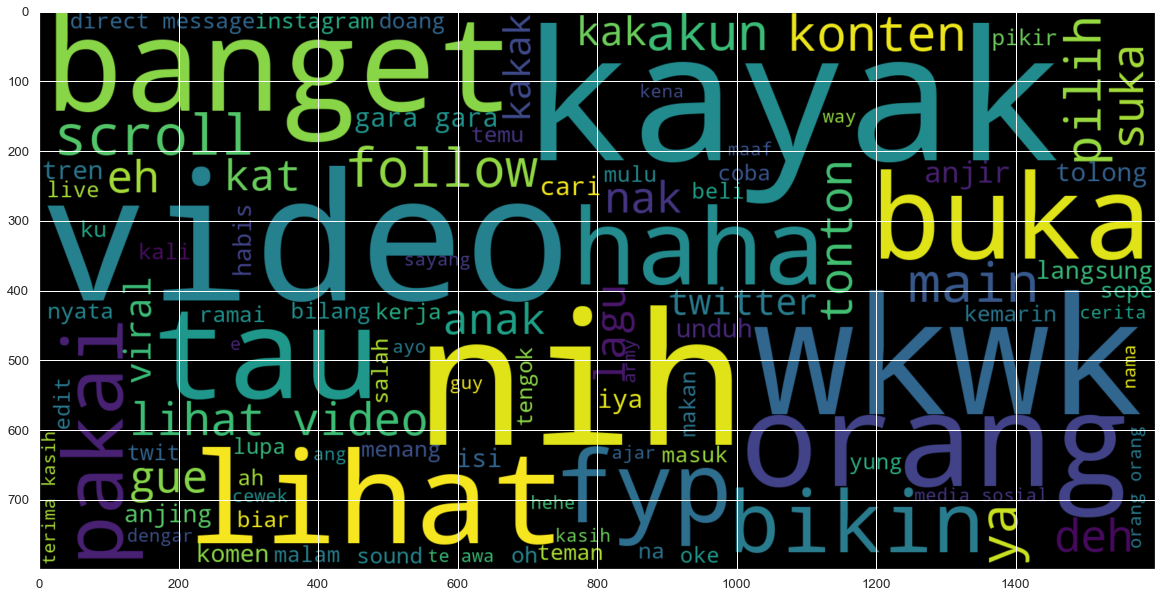

In [18]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(dfpredicted.cleanedcontent))
plt.imshow(wc , interpolation = 'bilinear')

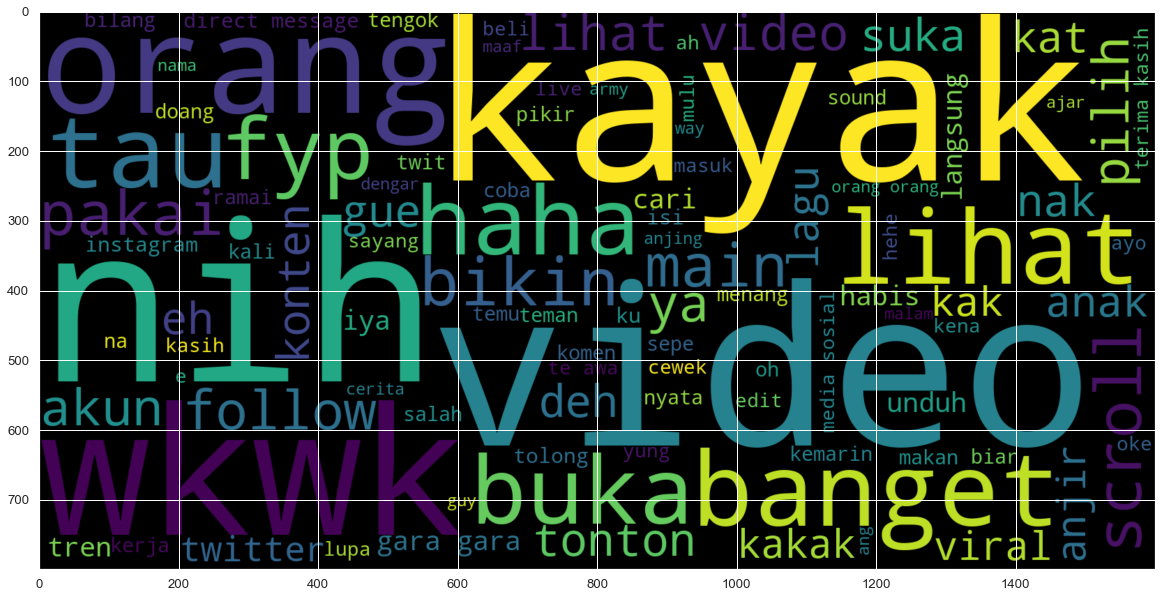

In [9]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(dfpredicted[dfpredicted.Predict == 'negatif'].cleanedcontent))
plt.imshow(wc , interpolation = 'bilinear')

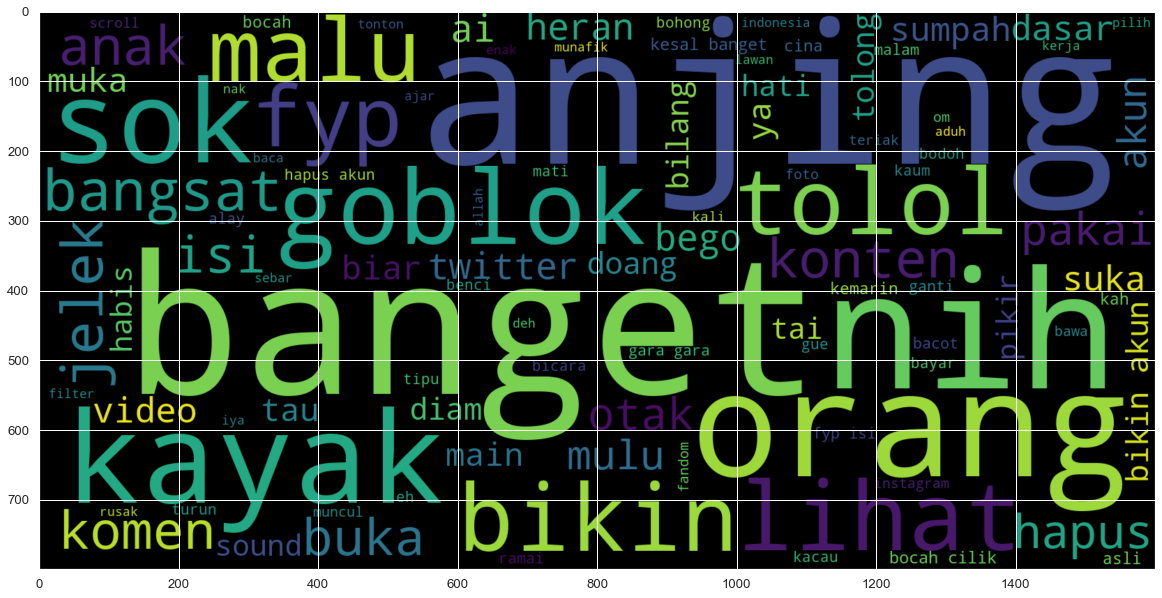

In [10]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(dfpredicted[dfpredicted.Predict == 'positif'].cleanedcontent))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
#Visualisasi jumlah negatif /positif, 
#Visualisasi berdasarkan waktu (2021-6 sampai 2021-10)
#Visualisasi cloud




#Visualisasi tweet favorite (berdasarkan like)

#Perbandingan Naive Bayes, K-Nearest...